pvalue_normal_approx(Binomial(100, 0.5), 60) = 0.04550026389635841
nulldist = Binomial(100, 1 / 3) = Binomial{Float64}(n=100, p=0.3333333333333333)
probability of P-value ≤ 5% = 0.05568


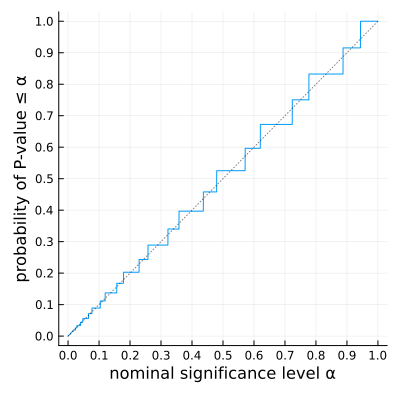

In [1]:
using Distributions
using StatsBase: ecdf
using StatsPlots
default(fmt=:png)

function pvalue_normal_approx(nulldist, x)
    m, s = mean(nulldist), std(nulldist)
    z = (x - m)/s
    2ccdf(Normal(), abs(z))
end

make_ecdf(Y) = (_ecdf = ecdf(Y); f(x) = _ecdf(x))

function plot_ecdf_pval(F_pval)
    plot(F_pval, 0, 1; label="")
    plot!(identity, 0, 1; label="", ls=:dot, c=:black, alpha=0.5)
    plot!(xtick=0:0.1:1, ytick=0:0.1:1)
    plot!(xguide="nominal significance level α",
        yguide="probability of P-value ≤ α")
    plot!(size=(400, 400))
end

@show pvalue_normal_approx(Binomial(100, 0.5), 60);

@show nulldist = Binomial(100, 1/3)
X = rand(nulldist, 10^6)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

nulldist = Binomial(100, 1 / 3) = Binomial{Float64}(n=100, p=0.3333333333333333)
altdist = Binomial(100, 1 / 2) = Binomial{Float64}(n=100, p=0.5)
probability of P-value ≤ 5% = 0.933449


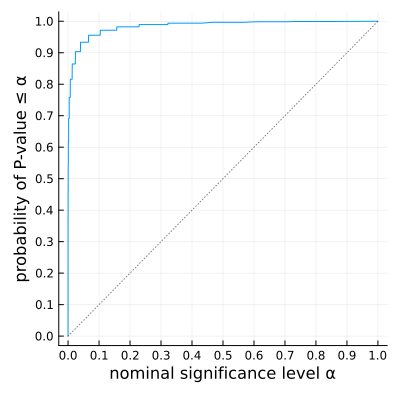

In [2]:
@show nulldist = Binomial(100, 1/3)
@show altdist = Binomial(100, 1/2)
X = rand(altdist, 10^6)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

nulldist = Poisson(30) = Poisson{Float64}(λ=30.0)
probability of P-value ≤ 5% = 0.054212


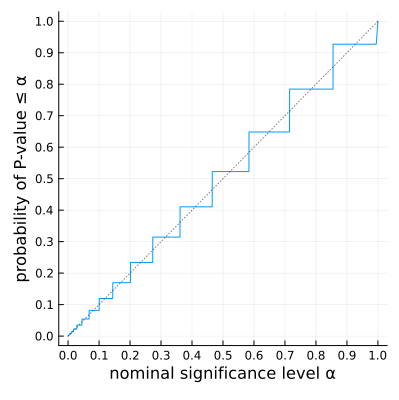

In [3]:
@show nulldist = Poisson(30)
X = rand(nulldist, 10^6)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

nulldist = NegativeBinomial(30, 0.7) = NegativeBinomial{Float64}(r=30.0, p=0.7)
probability of P-value ≤ 5% = 0.043339


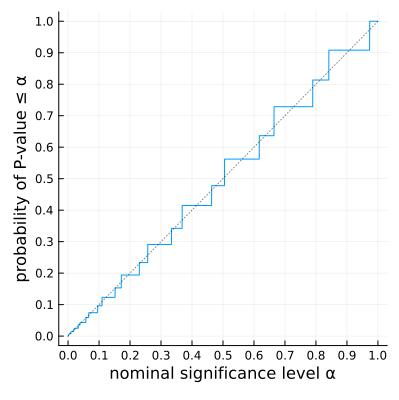

In [4]:
@show nulldist = NegativeBinomial(30, 0.7)
X = rand(nulldist, 10^6)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

nulldist = Hypergeometric(200, 200, 200) = Hypergeometric(ns=200, nf=200, n=200)
probability of P-value ≤ 5% = 0.056753


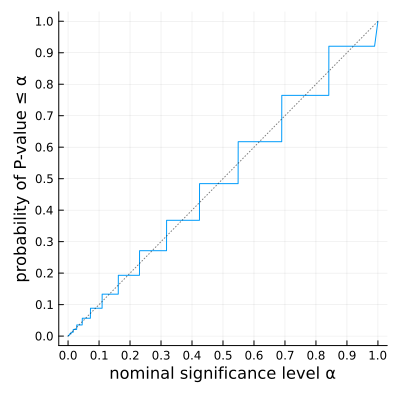

In [5]:
@show nulldist = Hypergeometric(200, 200, 200)
X = rand(nulldist, 10^6)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)